In [2]:
from env import HollowKnightEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecTransposeImage

import time


env = HollowKnightEnv()

test_env = HollowKnightEnv()  # 用于评估的环境
eval_env = Monitor(test_env)  # 包装为监控环境
eval_env = DummyVecEnv([lambda: eval_env])  # 包装为向量
eval_env = VecTransposeImage(eval_env)  # 转置图像以适应模型输入

model = PPO(policy="MultiInputPolicy", env=env, verbose=1, n_steps=512)

callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/hollow_knight_model',   # 最优模型保存目录
    log_path='./logs/',               # 日志目录
    n_eval_episodes= 2,  # 每次评估3个episode
    eval_freq=1024,                   # 每512步评估一次
)

# 站到雕像前，运行
time.sleep(2)
model.learn(1_0000, callback=callback)

AssertionError: The observation space must be an image or dictionary observation space

In [ ]:
from stable_baselines3.common.env_checker import check_env
from env import HollowKnightEnv

import time


env = HollowKnightEnv()

time.sleep(2)

check_env(env, warn=True)

[RESET] 第1轮战斗
[RESET] 第2轮战斗
timestep:1, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
[RESET] 第3轮战斗
timestep:2, action:('Turn_Left', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:3, action:('Turn_Left', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:4, action:('Turn_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:5, action:('Turn_Left', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:6, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:7, action:('Move_Left', 'Mid_Jump_Attack') reward:0.000, boss_hp:900, done:False
timestep:8, action:('Move_Left', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:9, action:('Move_Left', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:10, action:('Turn_Left', 'Mid_Jump_Attack') reward:0.000, boss_hp:900, done:False
timestep:11, action:('Move_Left', 'Attack') reward:0.000, boss_hp:900, done:False


In [ ]:
from env import HollowKnightEnv
from sb3_contrib.common.maskable.utils import get_action_masks

env = HollowKnightEnv()
obs, info = env.reset()
n_steps = 300
for _ in range(n_steps):
    # Random action
    # action_masks = get_action_masks(env)
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    if done:
        obs, info = env.reset()

[RESET] 第1轮战斗


KeyboardInterrupt: 

In [ ]:
from sb3_contrib.common.maskable.evaluation import evaluate_policy
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model.zip')


# # Evaluate the policy
# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

# print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")


obs, info = env.reset()
n_steps = 1000
for _ in range(n_steps):
    # Random action
    action_masks = get_action_masks(env)
    action = model.predict(obs, action_masks, deterministic=True)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        obs, info = env.reset()

[RESET] 第1轮战斗


KeyboardInterrupt: 

In [ ]:
from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

env = HollowKnightEnv()
model = MaskablePPO(policy='CnnPolicy', env=env, verbose=1, n_steps=256, tensorboard_log="./logs/")

model.learn(total_timesteps=5000)

model.save('./logs/hollow_knight_model.zip')

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
[RESET] 第1轮战斗
Logging to ./logs/PPO_1
time_step:239, boss_hp:302, epoch_reward:-21.060
[RESET] 第2轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 239      |
|    ep_rew_mean     | -21.1    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 99       |
|    total_timesteps | 256      |
---------------------------------
time_step:402, boss_hp:351, epoch_reward:-10.380
[RESET] 第3轮战斗
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 201        |
|    ep_rew_mean          | -15.7      |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 2          |
|    time_elapsed         | 195        |
|    total_timesteps      | 512 

In [ ]:
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO
from env import HollowKnightEnv

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model.zip')

obs, info = env.reset()
n_steps = 1000
for _ in range(n_steps):

    action_masks = get_action_masks(env)
    # print(action_masks)
    action = model.predict(obs, action_masks=action_masks, deterministic=False)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        break
        # obs, info = env.reset()

[RESET] 第1轮战斗
time_step:201, boss_hp:383, epoch_reward:-8.740


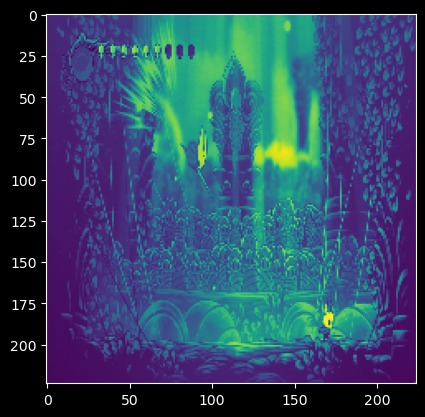

In [ ]:
from utils import get_frame_grey
import time
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 224

time.sleep(2)

frame = get_frame_grey()
frame_resized = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))



plt.imshow(frame_resized)

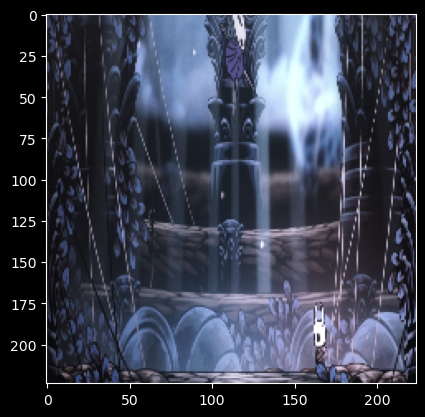

In [ ]:
from utils import get_frame_rgb
import time
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 224

time.sleep(2)

frame = get_frame_rgb()[180:600, 100:1080, :]
frame_resized = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))



plt.imshow(frame_resized)

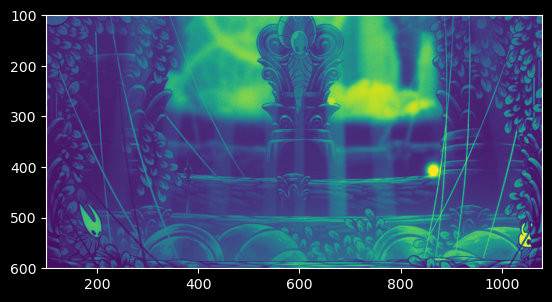

In [ ]:
plt.xlim(100, 1080) 
plt.ylim(600, 100)  

plt.imshow(frame)

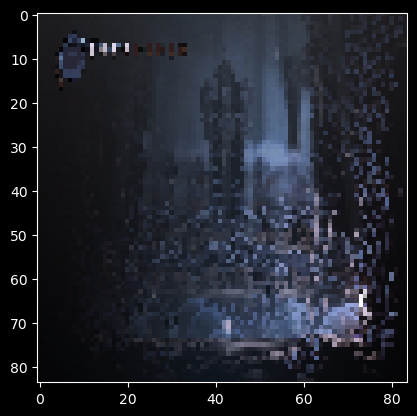

In [ ]:
from utils import get_frame_rgb
import time
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 84

time.sleep(2)

frame = get_frame_rgb()
frame_resized = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))



plt.imshow(frame_resized)

In [ ]:
from pathlib import Path

import pybullet_envs_gymnasium

from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

# Alternatively, you can use the MuJoCo equivalent "HalfCheetah-v4"
vec_env = make_vec_env("HalfCheetahBulletEnv-v0", n_envs=1)
# Automatically normalize the input features and reward
vec_env = VecNormalize(vec_env, norm_obs=True, norm_reward=True, clip_obs=10.0)

model = PPO("MlpPolicy", vec_env)
model.learn(total_timesteps=2000)

# Don't forget to save the VecNormalize statistics when saving the agent
log_dir = Path("/tmp/")
model.save(log_dir / "ppo_halfcheetah")
stats_path = log_dir / "vec_normalize.pkl"
vec_env.save(stats_path)

# To demonstrate loading
del model, vec_env

# Load the saved statistics
vec_env = make_vec_env("HalfCheetahBulletEnv-v0", n_envs=1)
vec_env = VecNormalize.load(stats_path, vec_env)
#  do not update them at test time
vec_env.training = False
# reward normalization is not needed at test time
vec_env.norm_reward = False

# Load the agent
model = PPO.load(log_dir / "ppo_halfcheetah", env=vec_env)

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize




class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)

        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])
train_env = VecNormalize(train_env, norm_obs=False, norm_reward=True)



model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    n_steps=512,
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=20000)
model.save('./logs/hollow_knight_model.zip')

stats_path = "./logs/vec_normalize.pkl"
train_env.save(stats_path)

Using cuda device
[RESET] 第1轮战斗
Logging to ./logs/PPO_1
time_step:242, boss_hp:483, epoch_reward:-23.460
[RESET] 第2轮战斗
time_step:404, boss_hp:332, epoch_reward:-18.960
[RESET] 第3轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 202      |
|    ep_rew_mean     | -21.2    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 196      |
|    total_timesteps | 512      |
---------------------------------
time_step:591, boss_hp:98, epoch_reward:-11.940
[RESET] 第4轮战斗
time_step:771, boss_hp:271, epoch_reward:-17.130
[RESET] 第5轮战斗
time_step:940, boss_hp:191, epoch_reward:-14.730
[RESET] 第6轮战斗
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 188         |
|    ep_rew_mean          | -17.2       |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 2         

In [ ]:
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO
from env import HollowKnightEnv

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model.zip')

obs, info = env.reset()
n_steps = 1000
for _ in range(n_steps):

    action_masks = get_action_masks(env)
    # print(action_masks)
    action = model.predict(obs, action_masks=action_masks, deterministic=True)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        break
        # obs, info = env.reset()

[RESET] 第1轮战斗
timestep:1, action:('Turn_Right', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:2, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:3, action:('Move_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:4, action:('Move_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:5, action:('Move_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:6, action:('Move_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:7, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:8, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:9, action:('Move_Right', 'Attack') reward:-1.000, boss_hp:900, done:False
timestep:10, action:('Move_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:11, action:('Move_Right', 'Attack_Down') reward:0.990, boss_hp:867, done:False
timestep:12, action:('Move_Right', 'Attack_Down') r

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize




class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)

        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])
train_env = VecNormalize(train_env, norm_obs=False, norm_reward=True)



model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    n_steps=512,
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=10_0000)
model.save('./logs/hollow_knight_model_2.zip')

stats_path = "./logs/vec_normalize_2.pkl"
train_env.save(stats_path)

Using cuda device
[RESET] 第1轮战斗
Logging to ./logs/PPO_5
time_step:208, boss_hp:374, epoch_reward:-20.220
[RESET] 第2轮战斗
time_step:438, boss_hp:63, epoch_reward:-10.890
[RESET] 第3轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 219      |
|    ep_rew_mean     | -15.6    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 200      |
|    total_timesteps | 512      |
---------------------------------
time_step:565, boss_hp:383, epoch_reward:-20.490
[RESET] 第4轮战斗
time_step:732, boss_hp:351, epoch_reward:-19.530
[RESET] 第5轮战斗
time_step:925, boss_hp:100, epoch_reward:-12.000
[RESET] 第6轮战斗
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 185         |
|    ep_rew_mean          | -16.6       |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 2         

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize




class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)

        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])
train_env = VecNormalize(train_env, norm_obs=False, norm_reward=True)



model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    n_steps=512,
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=8_0000)
model.save('./logs/hollow_knight_model_3.zip')

stats_path = "./logs/vec_normalize_3.pkl"
train_env.save(stats_path)


Using cuda device
[RESET] 第1轮战斗
Logging to ./logs/PPO_13
time_step:146, boss_hp:398, epoch_reward:-20.940
[RESET] 第2轮战斗
time_step:278, boss_hp:536, epoch_reward:-25.080
[RESET] 第3轮战斗
time_step:394, boss_hp:568, epoch_reward:-26.040
[RESET] 第4轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -24      |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 235      |
|    total_timesteps | 512      |
---------------------------------
time_step:513, boss_hp:410, epoch_reward:-21.300
[RESET] 第5轮战斗
time_step:653, boss_hp:386, epoch_reward:-20.580
[RESET] 第6轮战斗
time_step:809, boss_hp:386, epoch_reward:-20.580
[RESET] 第7轮战斗
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 135         |
|    ep_rew_mean          | -22.4       |
| time/                   |             |
|    fps       

In [ ]:
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO
from env import HollowKnightEnv
import time

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model_3.zip')

obs, info = env.reset()
n_steps = 1000
for _ in range(n_steps):

    action_masks = get_action_masks(env)
    # print(action_masks)
    action = model.predict(obs, action_masks=action_masks, deterministic=False)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        break
        # obs, info = env.reset()

[RESET] 第1轮战斗
time_step:127, boss_hp:594, epoch_reward:-26.820


In [1]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3.common.vec_env import VecNormalize




class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)

        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])



model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    
    # 🔧 关键修复参数
    n_steps=256,           # 减少rollout长度，提高更新频率
    learning_rate=1e-4,    # 大幅降低学习率（从3e-4到1e-4）
    n_epochs=4,            # 减少每次rollout的训练轮数
    batch_size=64,         # 明确设置批次大小
    clip_range=0.1,        # 降低裁剪范围（从0.2到0.1）
    target_kl=0.01,        # 添加KL散度早停机制
    
    # 🎯 微调其他参数
    vf_coef=0.5,          # 价值函数权重
    ent_coef=0.01,        # 熵系数，鼓励探索
    
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=8_0000)
model.save('./logs/hollow_knight_model_stable.zip')



Using cuda device
[RESET] 第1轮战斗
Logging to ./logs/PPO_17
time_step:196, boss_hp:361, epoch_reward:-19.830
[RESET] 第2轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 196      |
|    ep_rew_mean     | -19.8    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 110      |
|    total_timesteps | 256      |
---------------------------------
time_step:391, boss_hp:266, epoch_reward:-16.980
[RESET] 第3轮战斗
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 196           |
|    ep_rew_mean          | -18.4         |
| time/                   |               |
|    fps                  | 2             |
|    iterations           | 2             |
|    time_elapsed         | 214           |
|    total_timesteps      | 512           |
| train/                  |               |
|    approx_kl            | 0.0001312

In [2]:
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO
from env import HollowKnightEnv
import time

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model_stable_1.zip')

obs, info = env.reset()
n_steps = 2000
for _ in range(n_steps):

    action_masks = get_action_masks(env)
    # print(action_masks)
    action = model.predict(obs, action_masks=action_masks, deterministic=True)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        # break
        obs, info = env.reset()

[RESET] 第1轮战斗
time_step:176, boss_hp:0, epoch_reward:29.000
[RESET] 第2轮战斗
time_step:341, boss_hp:0, epoch_reward:29.000
[RESET] 第3轮战斗
time_step:506, boss_hp:0, epoch_reward:31.000
[RESET] 第4轮战斗
time_step:750, boss_hp:42, epoch_reward:-36.000
[RESET] 第5轮战斗
time_step:934, boss_hp:0, epoch_reward:33.000
[RESET] 第6轮战斗
time_step:1067, boss_hp:0, epoch_reward:33.000
[RESET] 第7轮战斗
time_step:1241, boss_hp:141, epoch_reward:-13.230
[RESET] 第8轮战斗
time_step:1425, boss_hp:45, epoch_reward:-10.350
[RESET] 第9轮战斗
time_step:1609, boss_hp:0, epoch_reward:29.000
[RESET] 第10轮战斗
time_step:1820, boss_hp:0, epoch_reward:29.000
[RESET] 第11轮战斗
time_step:1979, boss_hp:0, epoch_reward:31.000
[RESET] 第12轮战斗


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize




class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)

        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])
train_env = VecNormalize(train_env, norm_obs=False, norm_reward=True)



model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    
    # 🔧 关键修复参数
    n_steps=256,           # 减少rollout长度，提高更新频率
    learning_rate=2e-4,    # 大幅降低学习率（从3e-4到1e-4）
    # n_epochs=5,            # 减少每次rollout的训练轮数
    target_kl= 0.1, 
    
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=3_0000)
model.save('./logs/hollow_knight_model_stable.zip')



In [1]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize




class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)

        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])
train_env = VecNormalize(train_env, norm_obs=False, norm_reward=True)



model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    
    # 🔧 关键修复参数
    n_steps=256,           # 减少rollout长度，提高更新频率
    learning_rate=2e-4,    # 大幅降低学习率（从3e-4到1e-4）
    n_epochs=4,            # 减少每次rollout的训练轮数
    target_kl= 0.05, 
    
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=8_0000)
model.save('./logs/hollow_knight_model_stable_1.zip')



Using cuda device
[RESET] 第1轮战斗
Logging to ./logs/PPO_22
time_step:191, boss_hp:214, epoch_reward:-15.420
[RESET] 第2轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 191      |
|    ep_rew_mean     | -15.4    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 107      |
|    total_timesteps | 256      |
---------------------------------
time_step:292, boss_hp:737, epoch_reward:-31.110
[RESET] 第3轮战斗
time_step:472, boss_hp:403, epoch_reward:-21.090
[RESET] 第4轮战斗
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 157          |
|    ep_rew_mean          | -22.5        |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 2            |
|    time_elapsed         | 221          |
|    total_timesteps      | 512          |
| train/                  |